<a href="https://colab.research.google.com/github/SchimeNo/Deep-Learning-with-Python/blob/main/02_The_mathematical_building_blocks_of_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **02 The mathematical building blocks of neural networks** 
---


In [ ]:
#!pip install keras
from keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print("Shape:", train_images.shape,"Length:", len(train_labels),"Array:", train_labels,sep="\n")

Shape:
(60000, 28, 28)
Length:
60000
Array:
[5 0 4 ... 5 6 8]


In [ ]:
print("Shape:", test_images.shape,"Length:", len(test_labels),"Array:", test_labels,sep="\n")

Shape:
(10000, 28, 28)
Length:
10000
Array:
[7 2 1 ... 4 5 6]


## Network architecture

**Loss function:**
-  How the network will be able to measure its performance on
the training data, and thus how it will be able to steer itself in the right direction.

**Optimizer:**
- The mechanism through which the network will update itself
based on the data it sees and its loss function.

**Metrics:**
- Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).



In [ ]:
# Network architecture

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))


### The compilation step (optimizer, loss, metric)

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Preparing the image data

We’ll transform the data into a float32 array of shape (60000, 28 * 28) with values between 0 and 1


In [ ]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### Preparing the labels

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

###Train the network


In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.4323 - accuracy: 0.8766
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1089 - accuracy: 0.9685
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0695 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0473 - accuracy: 0.9860
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0366 - accuracy: 0.9889


### Use on test set

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0656 - accuracy: 0.9806
test_acc: 0.06563051789999008


# Tensors



Data stored in multidimensional Numpy arrays. It's a container for data—almost always numerical data. So, it’s a
container for numbers. You may be already familiar with matrices, which are 2D tensors: tensors are a generalization of matrices to an arbitrary number of dimensions
(note that in the context of tensors, a dimension is often called an axis).



#### Scalars (0D tensors)
A tensor that contains only one number is called a scalar

In [ ]:
import numpy as np
x=np.array(12)
print(x,"\ndim:", x.ndim)

12 
dim: 0


#### Vectors

In [ ]:
x = np.array([12, 3, 6, 14])
print("\ndim:", x.ndim)


dim: 1


#### Matrices (2D tensors) 

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]])
print("\ndim:", x.ndim)


dim: 2


#### 3D tensors and higher-dimensional tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]],
[[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]]])
print("\ndim:", x.ndim)


dim: 3


In deep learning, you’ll generally manipulate tensors that are 0D to 4D, although you may go up to
5D if you process video data. 

### Key attributes

* Number of axes (rank)—For instance, a 3D tensor has three axes, and a matrix has
two axes. Also called the tensor’s ndim .
* Shape—This is a tuple of integers that describes how many dimensions the tensor has along each axis. 
* Data type (usually called dtype in Python libraries)—This is the type of the data
contained in the tensor.




In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28)
uint8


We have here is a 3D tensor of 8-bit integers. More precisely, it’s an array of
60,000 matrices of 28 × 8 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255.

### Displaying a digit

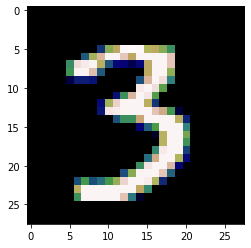

In [ ]:
digit = train_images[10000]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.gist_earth)
plt.show()

###  Manipulating tensors in Numpy

In [ ]:
my_slice=train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


####  select 14 × 14 pixels in the bottom-right corner of all images

In [ ]:
my_slice=train_images[:,14:,14:]
print(my_slice.shape)

(60000, 14, 14)


#### crop the images to patches of 14 × 14 pixels centered in the middle

In [ ]:
my_slice=train_images[:,7:-7, 7:-7]

### Data batches
The first axis will be the samples axis. In the MNIST example, samples are images of digits.

In, deep-learning models don’t process an entire dataset at once; rather,
they break the data into small batches. Concretely, here’s one batch of our MNIST digits, with batch size of 128


In [ ]:
batch = train_images[:128]

### Real-world examples of data tensors
Vector data—2D tensors of shape (samples, features)
* Timeseries data or sequence data—3D tensors of shape (samples, timesteps,
features)
* Images—4D tensors of shape (samples, height, width, channels) or (samples,
channels, height, width)
* Video—5D tensors of shape (samples, frames, height, width, channels) or
(samples, frames, channels, height, width)

# Tensor operations

In [ ]:
def naive_relu(x):
  assert len(x.shape) == 2
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

def naive_add(x,y):
  assert len(x.shape)==2
  assert x.shape == y.shape
  x=x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[i,j]
  return x

In [ ]:
#Keras layer instance
keras.layers.Dense(512, activation='relu')

#new representation for the input tensor (where W is a 2D tensor and b is a vector)
output=naive_relu(naive_add(W, input)+b)
output

NameError: ignored

* dot: product between the input tensor and a tensor named W
* (+) : addition (+) between the resulting 2D tensor and a vector b
+  relu(x):  rectified linear unit,  this returns the standard ReLU activation max(x, 0)




In [ ]:
import numpy as np
#Element-wise addition
z= x + y
#Element-wise relu
z = np.maximum(z,0.)

## Broadcasting

What happens with addition when the shapes of the two tensors
being added differ?

When possible, and if there’s no ambiguity, the smaller tensor will be broadcasted to match the shape of the larger tensor. Broadcasting consists of two steps:

1. Axes (called broadcast axes) are added to the smaller tensor to match the ndim of the larger tensor.
2. The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

In [ ]:
def naive_add_matrix_and_vector(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j]+=y[j]
  return x